## Imports

In [1]:
from glob import glob
import json
import numpy as np
import pandas as pd
import PIL

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style("dark", {'axes.grid' : False})
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
def img_resizer(filepath, new_width, new_height):
    img = PIL.Image.open(filepath)
    size = img.size
    if size[0] < size[1]:
        new_height = int(round(new_width * size[1] / size[0]))
        img_resized = img.resize((new_width, new_height), PIL.Image.ANTIALIAS)
    else:
        new_width = int(round(new_height * size[1] / size[0]))
        img_resized = img.resize((new_width, new_height), PIL.Image.ANTIALIAS)
    return img_resized

In [22]:
embeddings = np.load('ui_layout_vectors/ui_vectors.npy')

embeddings.shape

(72103, 64)

In [23]:
embeddings[0]

array([ 0.49343213,  0.        ,  0.        ,  1.53651595,  0.        ,
        0.35794488,  0.        ,  0.23277104,  0.95115042,  2.208148  ,
        0.10892372,  0.55113822,  0.        ,  0.22959103,  0.        ,
        0.        ,  1.32388139,  0.        ,  0.        ,  2.77431679,
        0.21085466,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.4383038 ,  0.        ,  0.64195049,  0.        ,  0.        ,
        0.        ,  0.57656568,  0.        ,  0.        ,  0.        ,
        0.80384398,  1.01261497,  0.        ,  0.        ,  0.        ,
        2.54284668,  1.35900021,  0.        ,  0.        ,  0.        ,
        0.        ,  0.30621642,  2.27725053,  0.        ,  1.22541595,
        1.36793232,  0.11166108,  0.        ,  1.08412075,  0.41839796,
        0.        ,  0.        ,  0.        ,  0.        ], dtype=float32)

In [73]:
with open('ui_layout_vectors/ui_names.json', 'r') as f:
    ui_names = json.load(f)

In [37]:
len(ui_names)

1

In [74]:
len(ui_names['ui_names'])

72103

In [75]:
ui_names

{'ui_names': ['28335.png',
  '21576.png',
  '20353.png',
  '49217.png',
  '26004.png',
  '65583.png',
  '41233.png',
  '67882.png',
  '47128.png',
  '69553.png',
  '8169.png',
  '41044.png',
  '58721.png',
  '41724.png',
  '48039.png',
  '49150.png',
  '5325.png',
  '28767.png',
  '15343.png',
  '9835.png',
  '31854.png',
  '61692.png',
  '38022.png',
  '64909.png',
  '13779.png',
  '56189.png',
  '30862.png',
  '13541.png',
  '48673.png',
  '3325.png',
  '12163.png',
  '4506.png',
  '66012.png',
  '71559.png',
  '4979.png',
  '2766.png',
  '9179.png',
  '17995.png',
  '8056.png',
  '12314.png',
  '12461.png',
  '4531.png',
  '60657.png',
  '26312.png',
  '12290.png',
  '66776.png',
  '2212.png',
  '21791.png',
  '57313.png',
  '7690.png',
  '46925.png',
  '7215.png',
  '5274.png',
  '61379.png',
  '11013.png',
  '24307.png',
  '25131.png',
  '31528.png',
  '59999.png',
  '62246.png',
  '21838.png',
  '44728.png',
  '28176.png',
  '63403.png',
  '53214.png',
  '26198.png',
  '20857.png

In [90]:
import matplotlib.pyplot as plt


from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk

In [91]:
image = img_as_ubyte(data.camera())

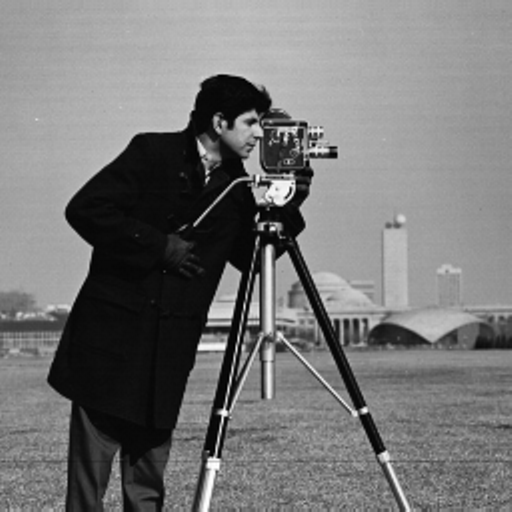

In [94]:
Image.fromarray(image)

In [97]:
ent = entropy(image, disk(5))

In [99]:
ent.shape

(512, 512)

In [95]:
# First example: object detection.

noise_mask = 28 * np.ones((128, 128), dtype=np.uint8)
noise_mask[32:-32, 32:-32] = 30

noise = (noise_mask * np.random.random(noise_mask.shape) - 0.5 *
         noise_mask).astype(np.uint8)
img = noise + 128

entr_img = entropy(img, disk(10))

In [100]:
entr_img.shape

(128, 128)

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

ax0.imshow(noise_mask, cmap='gray')
ax0.set_xlabel("Noise mask")
ax1.imshow(img, cmap='gray')
ax1.set_xlabel("Noisy image")
ax2.imshow(entr_img, cmap='viridis')
ax2.set_xlabel("Local entropy")

fig.tight_layout()